---
# Mounting of Google Drive
---
Linking the Google Drive to Google CoLab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
CourseFolder = "/content/gdrive/MyDrive/Crafting/BDLCV"

---
# Load an image
---
Image pre-processing is best performed using OpenCV and Imutils.


In [ ]:
import matplotlib.pyplot as plt
import imutils
import cv2

original_image = cv2.imread(CourseFolder + '/images/car-224.jpg')

---
# Flipping image
---
the ```flip``` function of ```OpenCV``` flips an image based on the second parameter. We can pass the following values to the second parameter:
* 0, for flipping the image around the x-axis (vertical flipping)
* \> 0, for flipping around the y-axis (horizontal flipping)
* \< 0, for flipping around both axes.

In [ ]:
vertical_flip = cv2.flip(original_image, 0)
horizontal_flip = cv2.flip(original_image, 1)
both_flip = cv2.flip(original_image, -1)

Matplotlib allows display of multiple images within one play through the feature of ```subplot```.

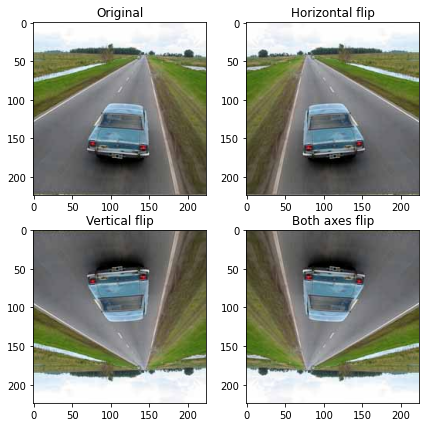

In [ ]:
plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
plt.imshow(imutils.opencv2matplotlib(original_image))
plt.gca().title.set_text('Original')

plt.subplot(2, 2, 2)
plt.imshow(imutils.opencv2matplotlib(horizontal_flip))
plt.gca().title.set_text('Horizontal flip')

plt.subplot(2, 2, 3)
plt.imshow(imutils.opencv2matplotlib(vertical_flip))
plt.gca().title.set_text('Vertical flip')

plt.subplot(2, 2, 4)
plt.imshow(imutils.opencv2matplotlib(both_flip))
plt.gca().title.set_text('Both axes flip')

plt.show()

---
# Rotate image
---
```OpenCV``` provides a ```rotate``` function to rotate image in a factor of 90 degrees. To rotate other angles, it requires constructing a rotation matrix and explicitly applying an affine warp.

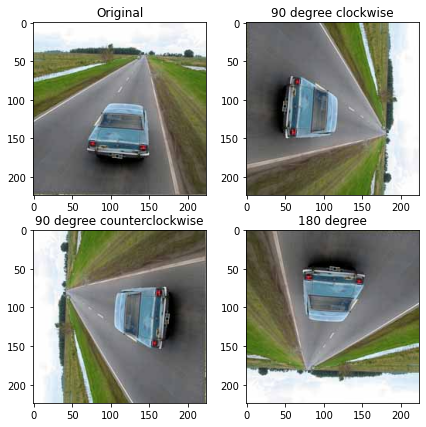

In [ ]:
rotate_90_cw = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)
rotate_90_ccw = cv2.rotate(original_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotate_180 = cv2.rotate(original_image, cv2.ROTATE_180)

plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
plt.imshow(imutils.opencv2matplotlib(original_image))
plt.gca().title.set_text('Original')

plt.subplot(2, 2, 2)
plt.imshow(imutils.opencv2matplotlib(rotate_90_cw))
plt.gca().title.set_text('90 degree clockwise')

plt.subplot(2, 2, 3)
plt.imshow(imutils.opencv2matplotlib(rotate_90_ccw))
plt.gca().title.set_text('90 degree counterclockwise')

plt.subplot(2, 2, 4)
plt.imshow(imutils.opencv2matplotlib(rotate_180))
plt.gca().title.set_text('180 degree')

plt.show()

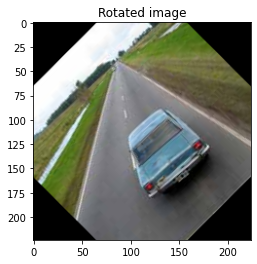

In [ ]:
degree_to_rotate = 45
height, width, channel = original_image.shape

rotation_matrix = cv2.getRotationMatrix2D((width//2, height//2), degree_to_rotate, 1.0)
rotated_image = cv2.warpAffine(original_image, rotation_matrix, (width,height))

plt.title('Rotated image')
plt.imshow(imutils.opencv2matplotlib(rotated_image))
plt.show()

Rotation using OpenCV is troublesome and the corners of the image are cropped. To avoid the cropping, we have to manually calculate the size of the bigger bounding box for the third parameter of the ```wrapAffine``` function.

Imutils provide two rotation functions, ```imutils.rotate``` and ```imutils.rotate_bound```, for we to perform rotation easily.

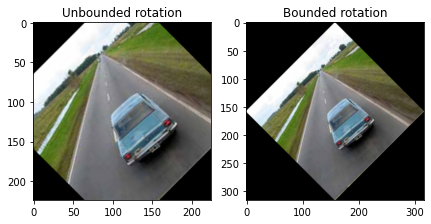

In [ ]:
unboud_rotate = imutils.rotate(original_image, degree_to_rotate)
bound_rotate = imutils.rotate_bound(original_image, -degree_to_rotate)
# Observe the negative sign on the second parameter

plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
plt.imshow(imutils.opencv2matplotlib(unboud_rotate))
plt.gca().title.set_text('Unbounded rotation')

plt.subplot(1, 2, 2)
plt.imshow(imutils.opencv2matplotlib(bound_rotate))
plt.gca().title.set_text('Bounded rotation')

plt.show()

---
# Zoom or Crop image
---
Zooming an image is essentially cropping the image follow by resizing the cropped image to the correct dimension.

As for Cropping, it is easily achieved using the python's array Slicing approach.<br>
Syntax: ``` <Array/List name>[starting_index : ending_index : incremental]```
* Default value of starting_index is 0
* Default value of ending_index is the size of the array/list
* Default value of incremental is 1

<br>Below are examples of the slicing.

In [ ]:
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 ,15]

print("Everything: ",numbers[::])
print("First 5: ",numbers[:5:])
print("Last 5: ",numbers[-5::])
print("Middle 5: ",numbers[3:3+5:])
print("Odd numbers: ",numbers[1::2])
print("Everything reverse: ",numbers[::-1])
print("Even numbers in reverse: ",numbers[-2::-2])

Everything:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
First 5:  [0, 1, 2, 3, 4]
Last 5:  [11, 12, 13, 14, 15]
Middle 5:  [3, 4, 5, 6, 7]
Odd numbers:  [1, 3, 5, 7, 9, 11, 13, 15]
Everything reverse:  [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Even numbers in reverse:  [14, 12, 10, 8, 6, 4, 2, 0]


Apply Slicing to the cropping of an image.

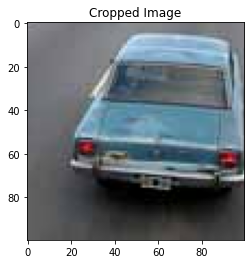

In [ ]:
x1, y1 = (50, 100) # top-left coordinate
x2, y2 = (150, 200) # bottom-right coordinate

cropped_image = original_image[ y1:y2: , x1:x2: , :: ]

plt.title("Cropped Image")
plt.imshow(imutils.opencv2matplotlib(cropped_image))
plt.show()

Resize the cropped image to have the Zooming effect.

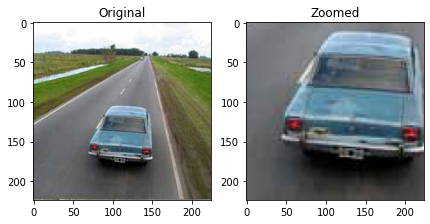

In [ ]:
Zoomed_image = imutils.resize(cropped_image, width = 224)

plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
plt.imshow(imutils.opencv2matplotlib(original_image))
plt.gca().title.set_text('Original')

plt.subplot(1, 2, 2)
plt.imshow(imutils.opencv2matplotlib(Zoomed_image))
plt.gca().title.set_text('Zoomed')

plt.show()

---
# Shifting/Translating image
---
Similar to rotation, ```OpenCV``` uses a transaltion matrix and ```wrapAffine``` function to perform the shifting of an image, which is troublesome. Therefore, ```imutils``` provide a ```translate``` function to perform image shifting easily.

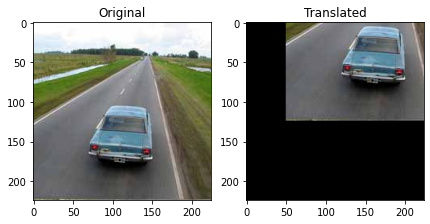

In [ ]:
x_shift = 50
y_shift = -100

translated_image = imutils.translate(original_image, x_shift, y_shift)

plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
plt.imshow(imutils.opencv2matplotlib(original_image))
plt.gca().title.set_text('Original')

plt.subplot(1, 2, 2)
plt.imshow(imutils.opencv2matplotlib(translated_image))
plt.gca().title.set_text('Translated')

plt.show()

---
# Channel Shifting/Colour change
---
ref: https://learnopencv.com/applycolormap-for-pseudocoloring-in-opencv-c-python/

OpenCV defines **12 colormaps** that can be applied to an image using the function ```applyColorMap``` to produce a pseudocolored image. 

Refer to the link for custom colormap.

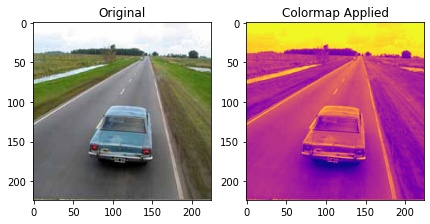

In [ ]:
colormaped_image = cv2.applyColorMap(original_image, cv2.COLORMAP_PLASMA)
# Try out different colormap

plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
plt.imshow(imutils.opencv2matplotlib(original_image))
plt.gca().title.set_text('Original')

plt.subplot(1, 2, 2)
plt.imshow(imutils.opencv2matplotlib(colormaped_image))
plt.gca().title.set_text('Colormap Applied')

plt.show()

---
# Image Augmentation using Keras
---
Keras is a Deep Learning library that comes with Tensorflow. It provides an Image Augmentation function that randomly performs all the shifting, zooming, rotating, etc.<br>
ref: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Shape of the images array:  (11, 100, 100, 3)


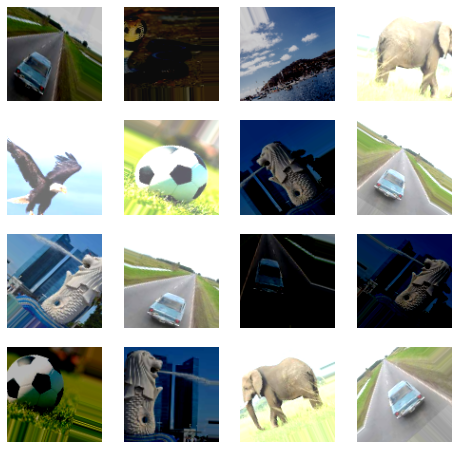

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imutils import paths
import numpy as np

# Put all images into an array
images = []
for imagePath in paths.list_images(CourseFolder + "/images"):
  image = cv2.imread(imagePath)
  image = cv2.resize(image, (100,100) )
  images.append(imutils.opencv2matplotlib(image))

images = np.array(images, dtype= np.float16)
images /= 255

print("Shape of the images array: ",images.shape)

# refer to the reference for the full capapbilities
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.5,
    horizontal_flip=True,
    vertical_flip=False,
    data_format="channels_last",
    dtype=np.float16,
)

image_iterator = datagen.flow(images, batch_size=1)

plt.figure(figsize=(8,8))
for i in range(16):
  one_image = next(image_iterator)[0]
  plt.subplot(4, 4, i+1)
  plt.imshow(one_image)
  plt.axis('off')
plt.show()

---
# Image Overlay (Optional)
---
Image overlay is to add more information onto an image, for example text, circle, box, line, etc.

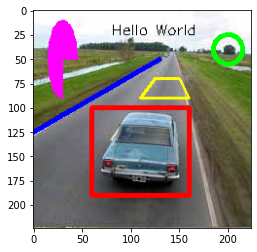

In [ ]:
# Draw a line
cv2.line(
    original_image, # Image
    (0, 125), # Start coordinate
    (130, 50), # End coordinate
    (255, 0, 0), # Colour in BGR
    3 # Thickness
)

# Draw a rectangle
cv2.rectangle(
    original_image, # Image
    (60, 100), # Top-left corner
    (160, 190), # Bottom-right corner
    (0, 0, 255), # Colour in BGR
    3 # Thickness, -1 to fill
)

# Draw a circle
cv2.circle(
    original_image,
    (200, 40), # Center coordinate
    15, # Radius
    (0, 255, 0), # Colour in BGR
    3 # Thickness, -1 to fill
)

#Draw a Ellipse
cv2.ellipse(
    original_image, # Image
    (30, 50), # Center
    (40, 15), # Axes size
    90, # Angle of the Ellipse
    0, # Start angle
    270, # End angle
    (255, 0, 255), # Colour in BGR
    -1 # Thickness, -1 to fill
)

# Draw a text
cv2.putText(
    original_image, # Image
    "Hello World", # Text to diaplay
    (80, 25), # Bottom-left position of the text
    cv2.FONT_HERSHEY_SIMPLEX, # Font type
    0.5, # Font Scale
    (0, 0, 0), # Colour in BGR
)

# Draw Polylines / Polygon
points = np.array([[[125,70]],[[150,70]],[[160,90]],[[110,90]]], np.int32)
cv2.polylines(
    original_image, # Image
    [points],
    True, # Is a closed polygon
    (0, 255, 255), #Colour in BGR
    2 # Thickness, -1 to fill
)

plt.imshow(imutils.opencv2matplotlib(original_image))
plt.show()

original_image = cv2.imread(CourseFolder + '/images/car-224.jpg')